In [97]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_, pop_l, g2_l, g1_l, g2_0_l, g1_0_l = setup_data("lapatinib");
conc, pop_g, g2_g, g1_g, g2_0_g, g1_0_g = setup_data("doxorubicin");
conc_l = append!([0.1], conc_[2:end]);
conc_g = append!([0.1], conc[2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/DrugResponseModel.jl/src/importData.jl:37


In [35]:
# Lapatinib
ec50lowL = 50.0
ec50highL = 500.0
ec50guessL = 100.0
guessL = [ec50guessL, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 15.0, 15.0, 20.0, 20.94827, ec50guessL, 0.00294624, ec50guessL, 0.0422821]

# doxorubicin
ec50lowg = 20.0
ec50highg = 500.0
ec50guessg = 80.0
guessg = [ec50guessg, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 20.0, 20.0, 15.0, 15.94827, ec50guessg, 0.00294624, ec50guessg, 0.0422821]

# max num of steps
num_steps=10000;

In [36]:
# best_fitL, paramsL = optimize_hill(guessL, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps, ec50lowL, ec50highL)
best_fitG, paramsG = optimize_hill(guessg, conc_g, g1_g, g2_g, g1_0_g, g2_0_g, num_steps, ec50lowg, ec50highg)


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
100.13 secs, 647 evals, 532 steps, improv/step: 0.427 (last = 0.4267), fitness=37532.539503966
200.23 secs, 1296 evals, 1181 steps, improv/step: 0.361 (last = 0.3066), fitness=26202.216537808
300.34 secs, 1942 evals, 1827 steps, improv/step: 0.335 (last = 0.2879), fitness=19843.622495953
400.46 secs, 2580 evals, 2466 steps, improv/step: 0.304 (last = 0.2144), fitness=16780.329627067
500.57 secs, 3214 evals, 3100 steps, improv/step: 0.291 (last = 0.2413), fitness=15265.863754700
600.62 secs, 3844 evals, 3730 steps, improv/step: 0.274 (last = 0.1921), fitness=14800.988540558
700.62 secs, 4471 evals, 4357 steps, improv/step: 0.262 (last = 0.1914), fitness=14071.608590525
800.70 secs, 5100 evals, 4986 steps, improv/step: 0.253 (last = 0.1908), fitness=13346.767123822
900.78 secs, 5722 evals, 

(12602.331329042394, [288.3035655655143, 1.6536004437382117, 0.009140282462678768, 0.04954725383419303, 0.11083069019092948, 0.026804881078316283, 6.001007370446111, 5.00492374357927, 6.056789264523632, 5.012486035882903, 20.048338815120985, 0.04609530103745344, 20.233468521418107, 0.009973626476643363])

In [111]:
# parsL=getDDEparams(paramsL, conc_l)
# parsG=getDDEparams(paramsG, conc_g)
# using CSV, DataFrames
# CSV.write("parsD.csv",  DataFrame(parsG), writeheader=false)
parsD = CSV.read("parsD.csv", header=false)
parsL = CSV.read("parsL.csv", header=false)
parsG = convert(Matrix, parsD)
parsL = convert(Matrix, parsL);

In [112]:
# plot doxorubicin
plot_all(parsG, pop_g, g2_g, g1_g, g2_0_g, g1_0_g);
# savefig("dox.png")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/plot.jl:29


In [110]:
# plot hill for doxorubicin
plot_parameters(conc_g, parsG);

In [109]:
using Plots; pyplot();
function plot3D(parsL, parsG, j::Int, title::String)

    param1 = ParamForBliss(parsL)
    param2 = ParamForBliss(parsG)
    combin = BlissCombination(parsL, parsG)

    plot(param1[j,:],param2[j,:],combin[:,:,j],st=:surface,camera=(-40,20), xlabel="lapatinib", ylabel="doxorubicin", zlabel="combination", title=title)
    plot!(size = (800, 600), dpi=150)
end
param1 = ParamForBliss(parsL)
param2 = ParamForBliss(parsG)
combin = BlissCombination(parsL, parsG);


In [94]:
plot3D(parsL, parsG, 1, "doxorubicin-lapatinib, alpha");
# savefig("doxlapalpha.png")

In [95]:
plot3D(parsL, parsG, 2, "doxorubicin-lapatinib, beta");
# savefig("doxlapbeta.png")

In [96]:
plot3D(parsL, parsG, 3, "doxorubicin-lapatinib, gamma");
# savefig("doxlapgamma.png")

In [99]:
ddeparam = DDEcombinationParam(combin, parsL, parsG);

In [100]:
# pyplot();
using Measures

function plotUnitCombin(params::Array, i::Int, title::String, bool::Any, g2::Matrix, g1::Matrix, g2_0::Array, g1_0::Array, concL, ConcGem)
    """ Given estimated parameters for each trial, 
    solve the DDE model plot the predicted curve 
    for # of cells in G1, G2, or total, 
    along with their corresponding real data,
    for a longer time which is 2 times of the 
    original time (~195 hours)
    """
    n_times = range(0.0; stop = 200.0, length = 400)
    alg, n_prob, _ = ddesolve(collect(n_times), g1, g2, g1_0, g2_0, params, i)

    solution = solve(n_prob, alg; constrained=true)

    plot(n_times, solution(n_times, idxs=1).u, label = "G1", xlabel = "time [hours]", ylabel = "number of cells", lw=2.0, alpha = 0.6, color =:green)
    plot!(n_times, solution(n_times, idxs=2).u, label = "G2", legend=bool, legendfontsize=7, fg_legend = :transparent, lw=2.0, alpha = 0.6, color=:sienna)
    plot!(n_times, (solution(n_times, idxs=2).u + solution(n_times, idxs=1).u), label = "total", dpi = 250, lw=2.0, alpha = 0.6, color=:hotpink, margin = 20mm)
    plot!(annotation=(100.5,125.0, text("$concL nM lapat. & $ConcGem nM Dox.", 10)))
end


function plot4combin(ddeparam, g2_l::Matrix, g1_l::Matrix, g2_0_l::Array, g1_0_l::Array, i::Int, conc_l ,conc_g)
    """ here we plot 8 combinations of lapatinib i and all the doxorubicin """ 
    concLap = conc_l[i]
    p1 = plotUnitCombin(ddeparam[i,1,:], 1, "", true, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[1])
    p2 = plotUnitCombin(ddeparam[i,2,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[2])
    p3 = plotUnitCombin(ddeparam[i,3,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[3])
    p4 = plotUnitCombin(ddeparam[i,4,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[4])
    p5 = plotUnitCombin(ddeparam[i,5,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[5])
    p6 = plotUnitCombin(ddeparam[i,6,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[6])
    p7 = plotUnitCombin(ddeparam[i,7,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[7])
    p8 = plotUnitCombin(ddeparam[i,8,:], 1, "", false, g2_l, g1_l, g2_0_l, g1_0_l, concLap, conc_g[8])
    plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2,4))
    plot!(size = (1600, 600), dpi = 250)
    ylims!((0.0, 120.0))
end

plot4combin (generic function with 1 method)

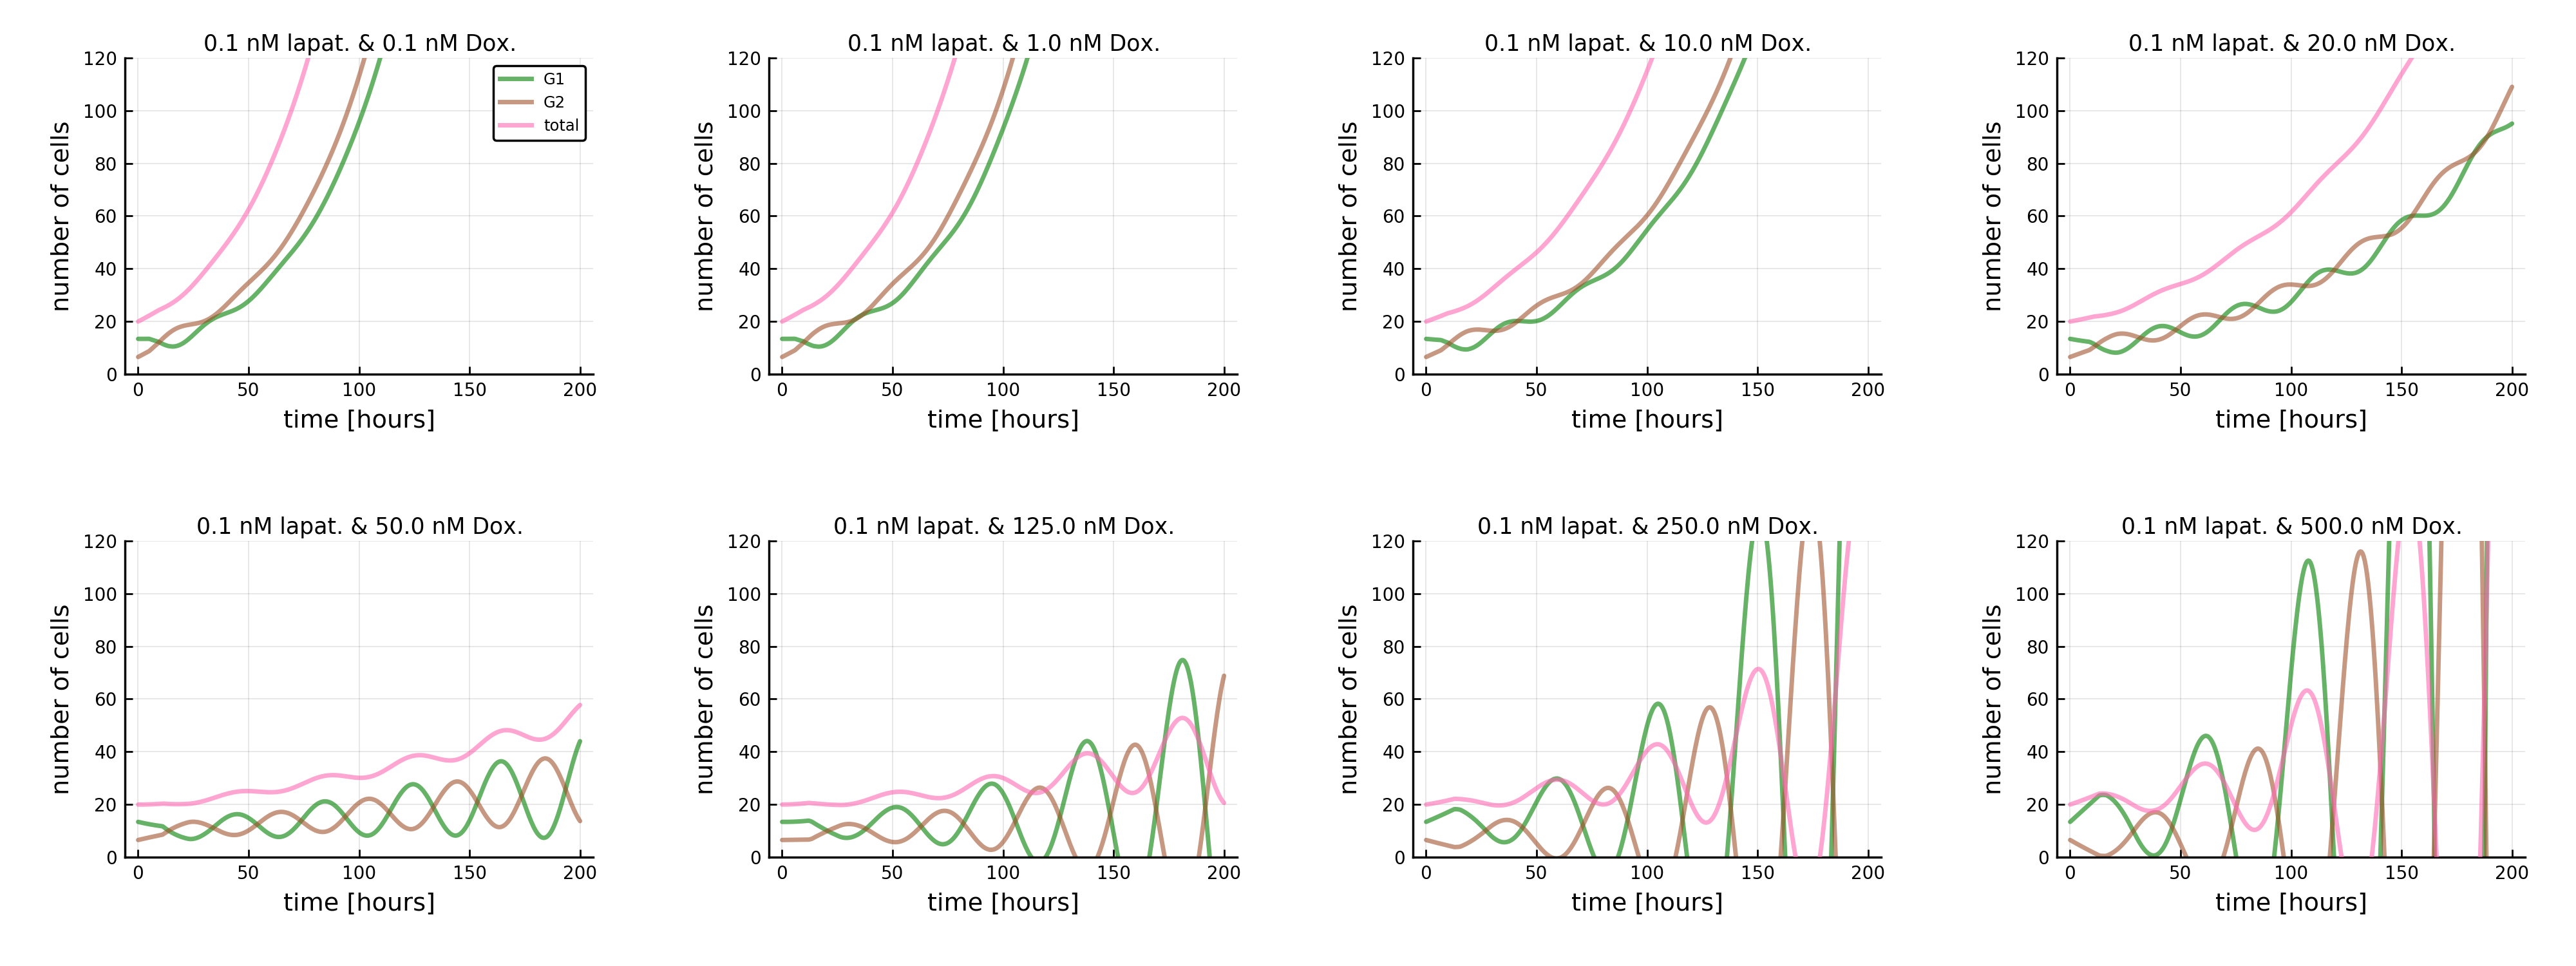

In [101]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 1, conc_l,conc_g)

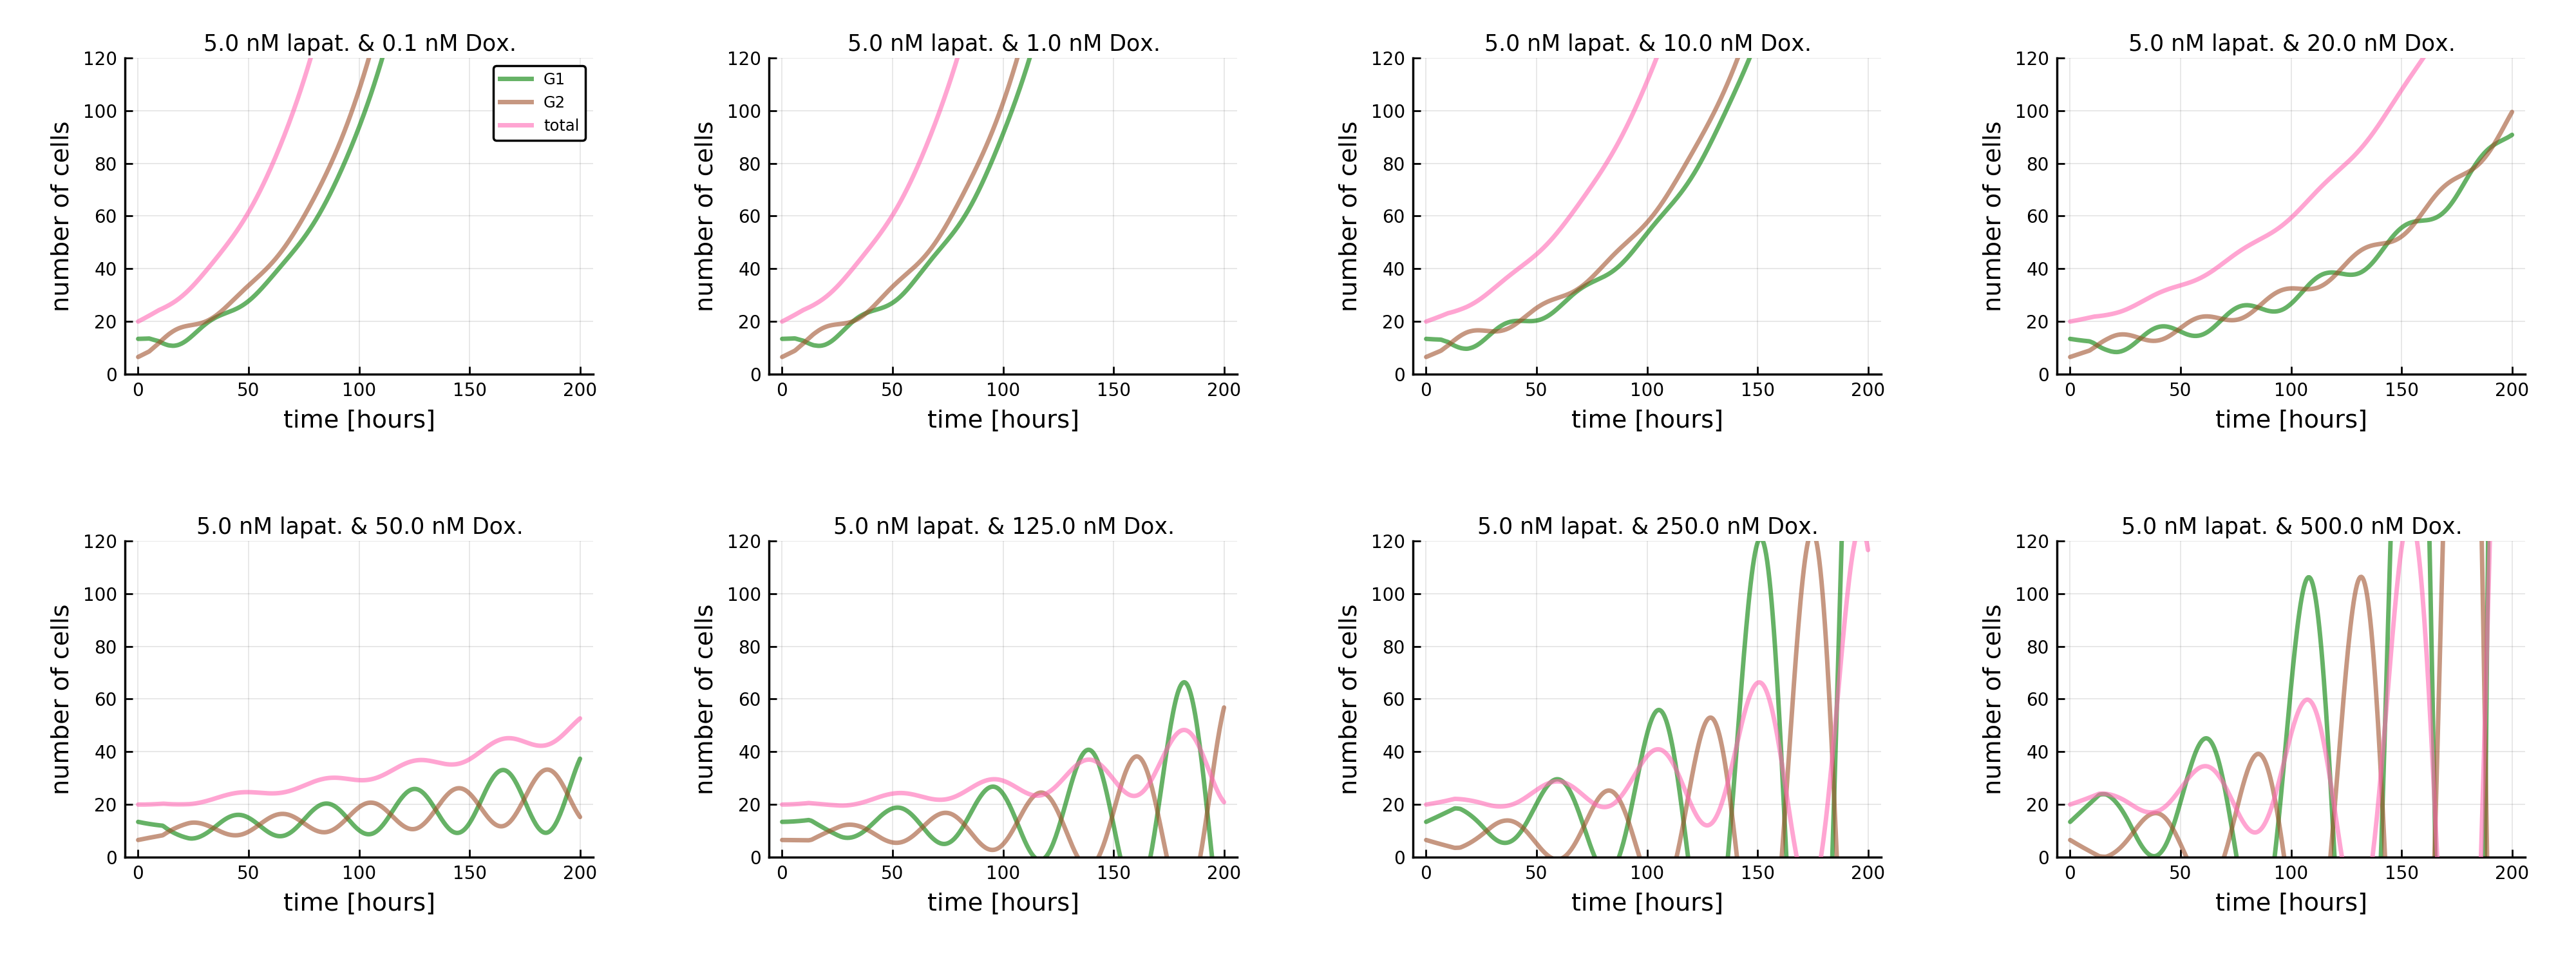

In [102]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 2, conc_l,conc_g)

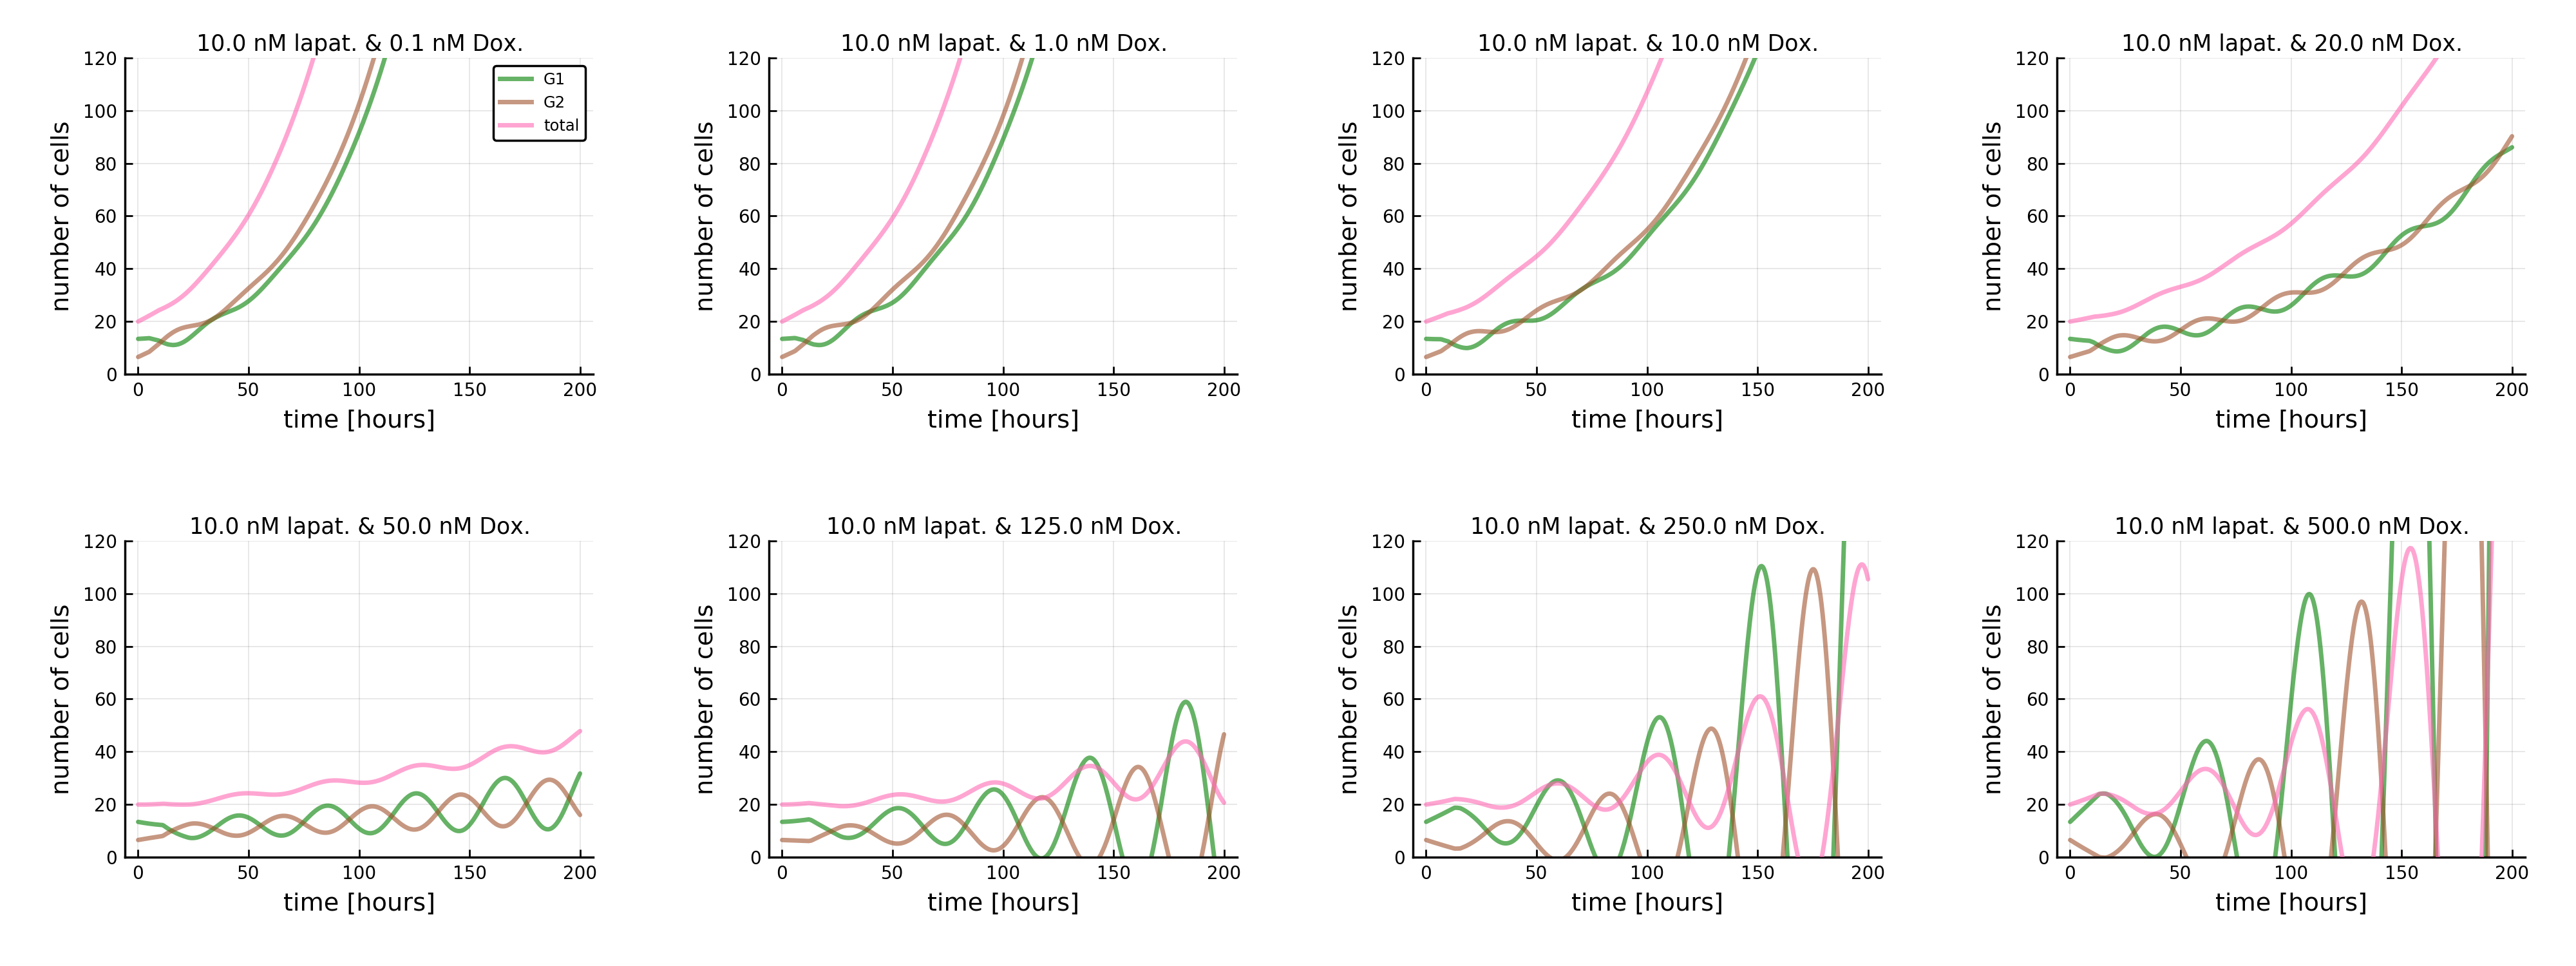

In [103]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 3, conc_l,conc_g)

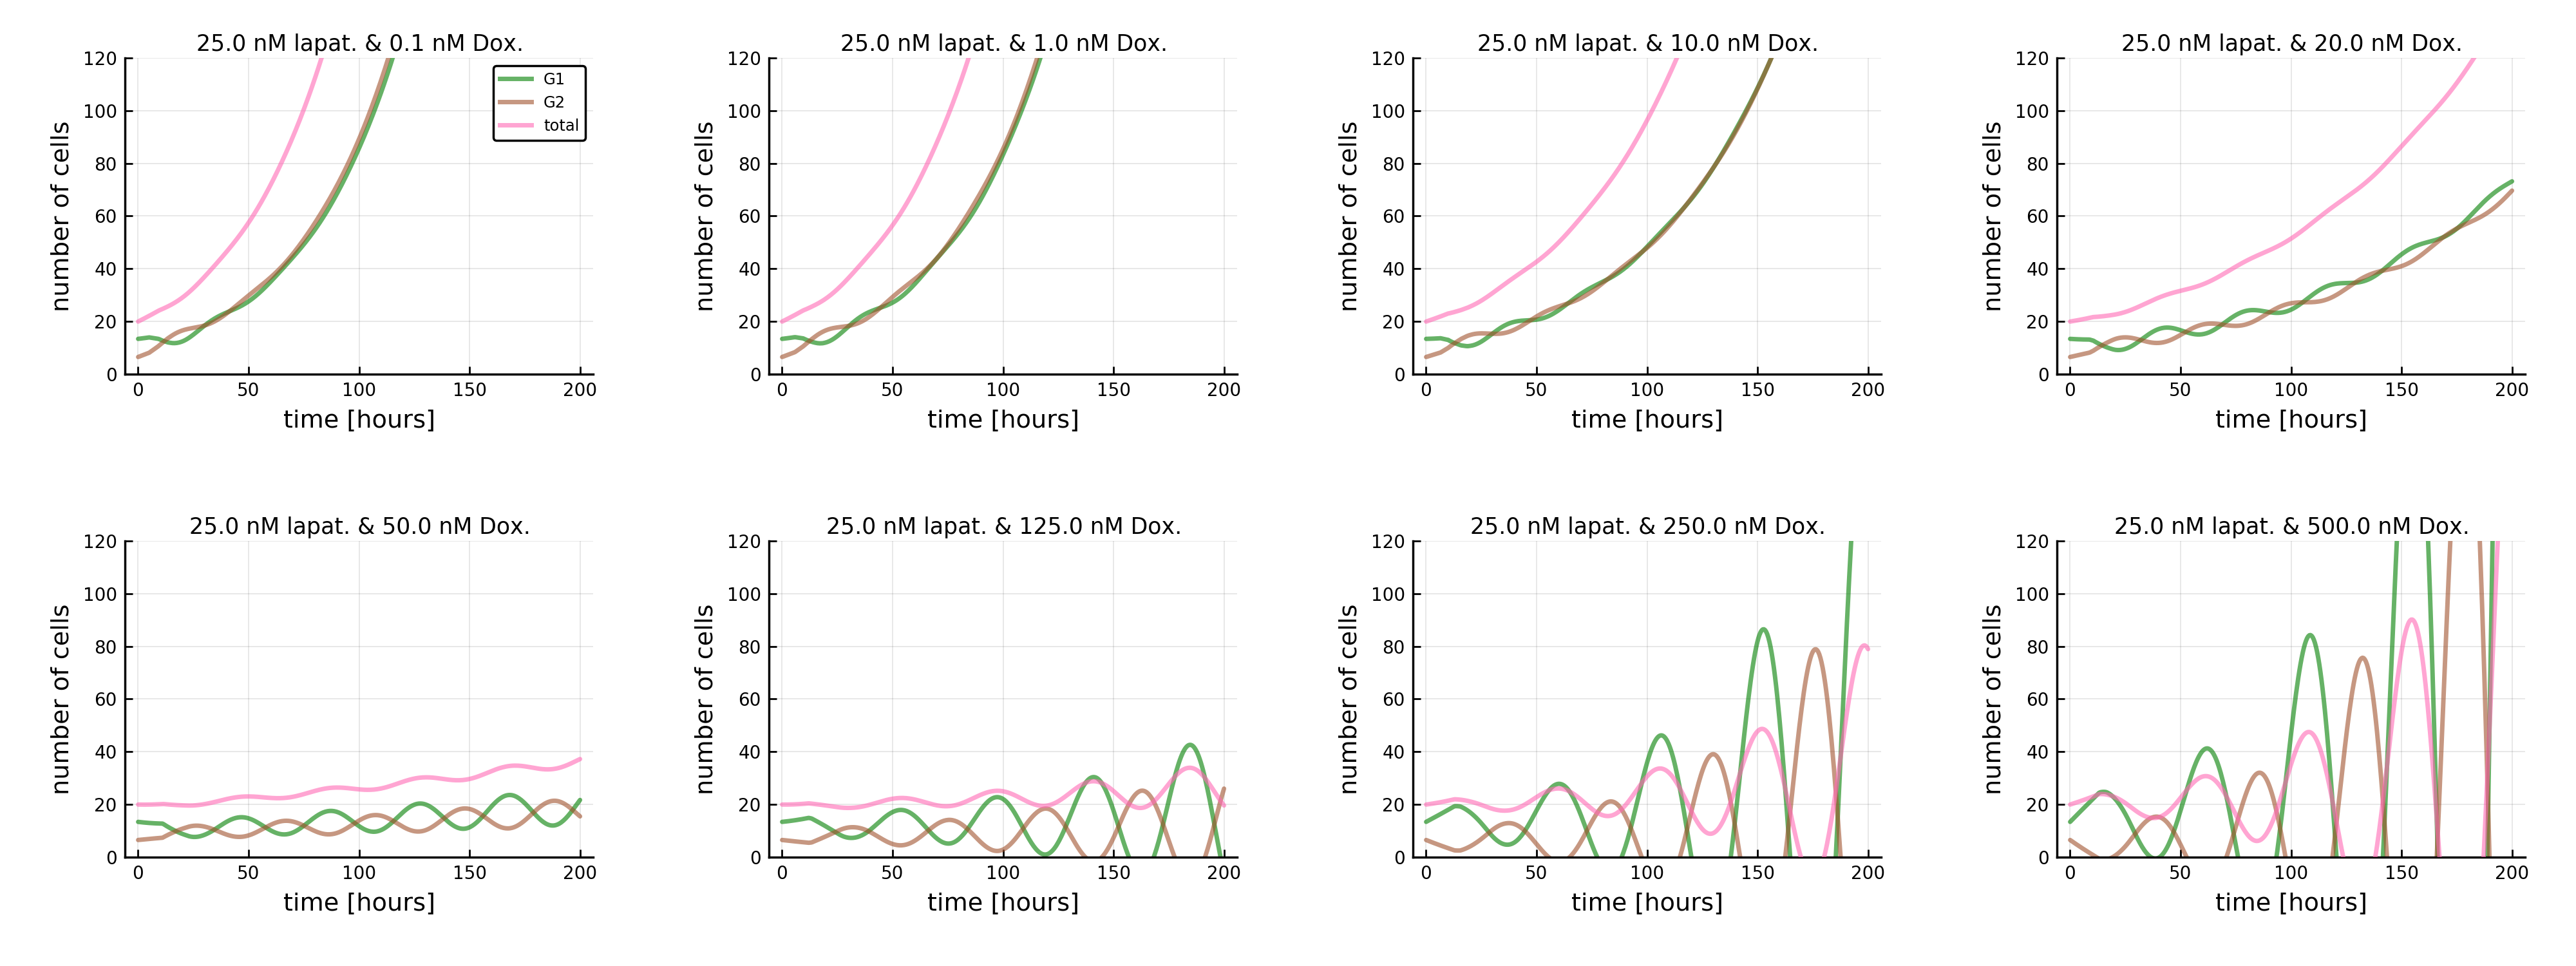

In [104]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 4, conc_l,conc_g)

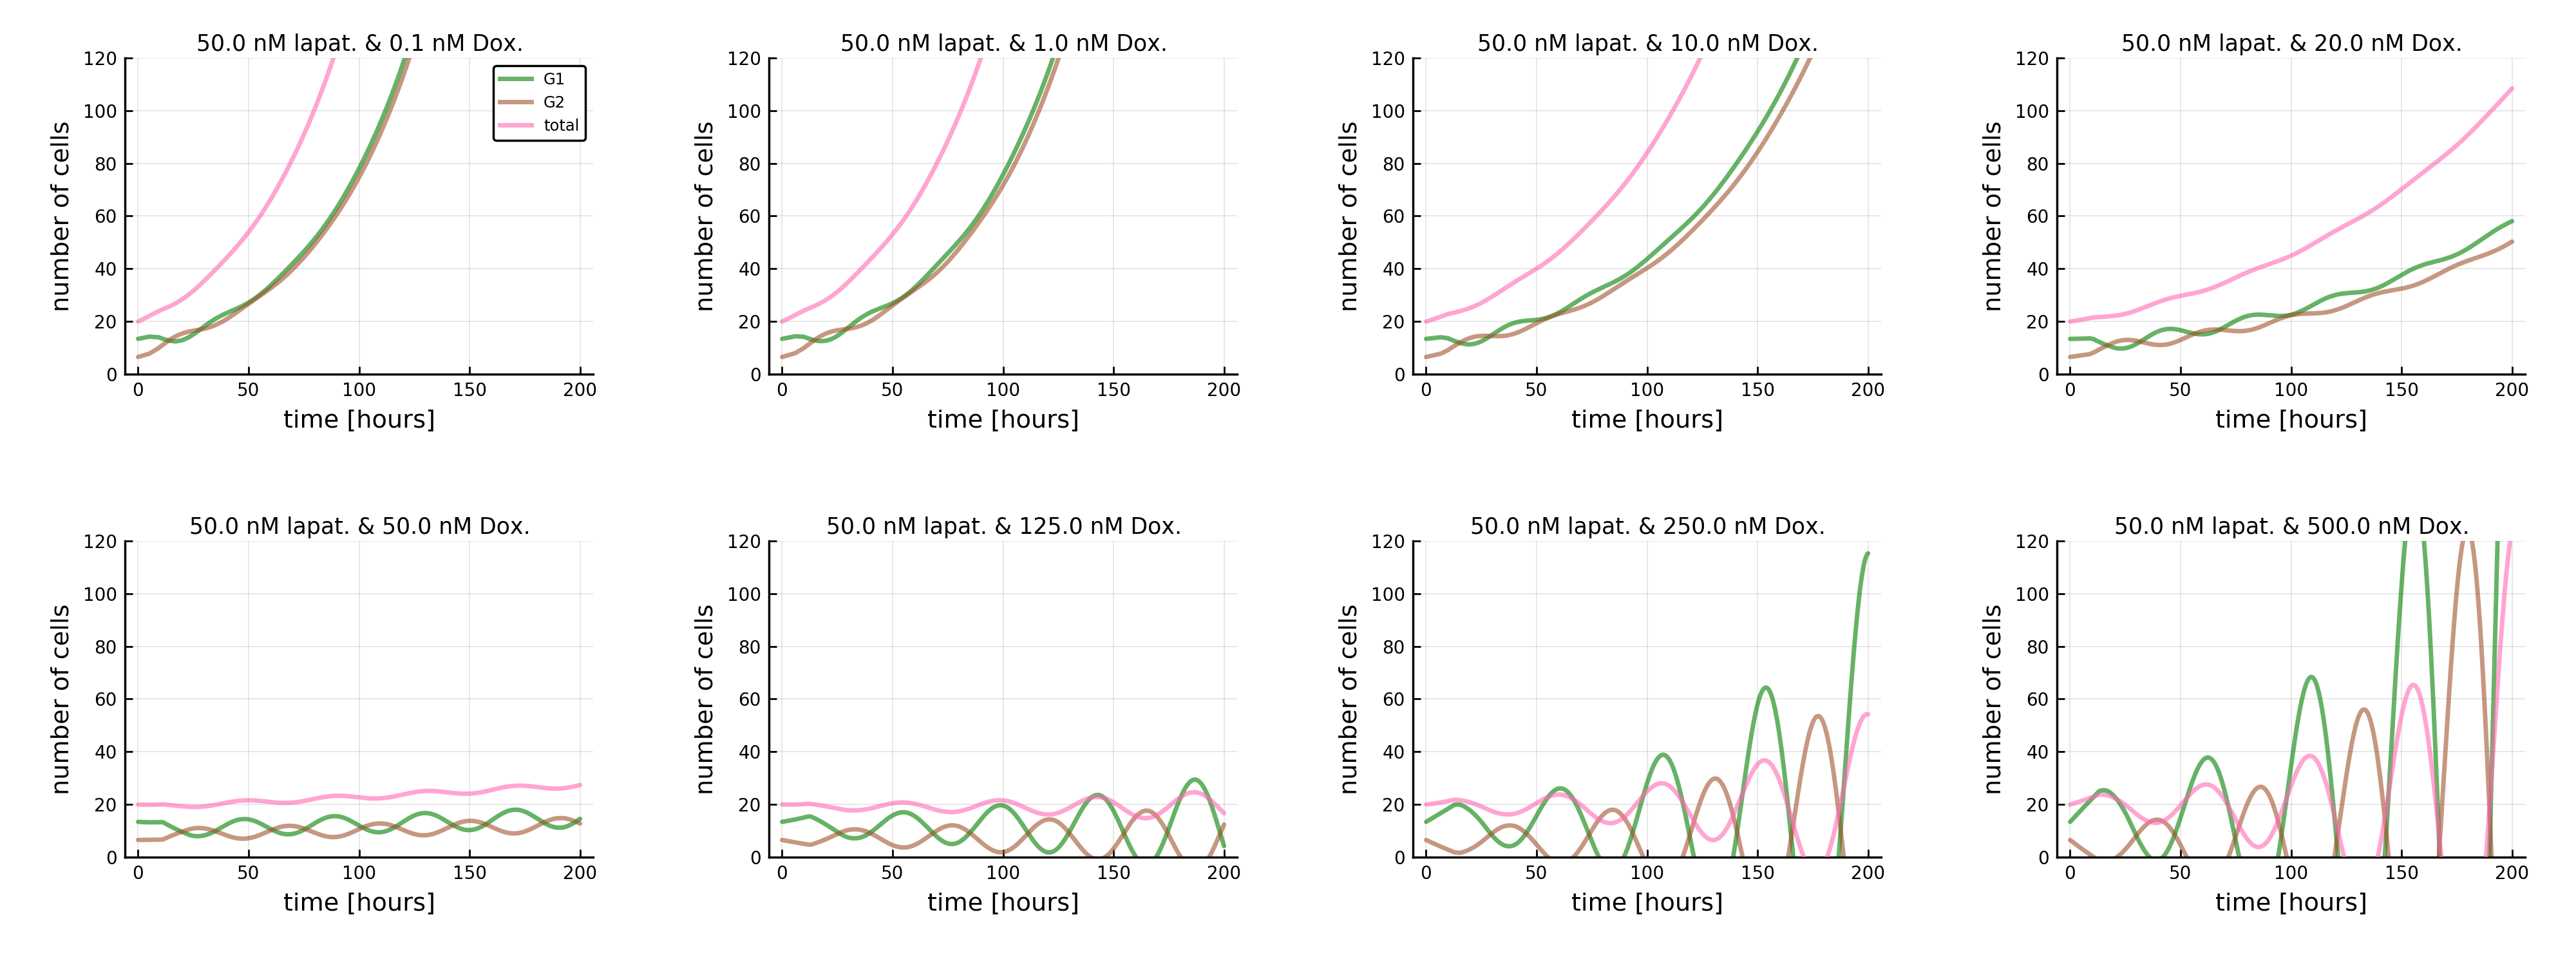

In [105]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 5, conc_l,conc_g)

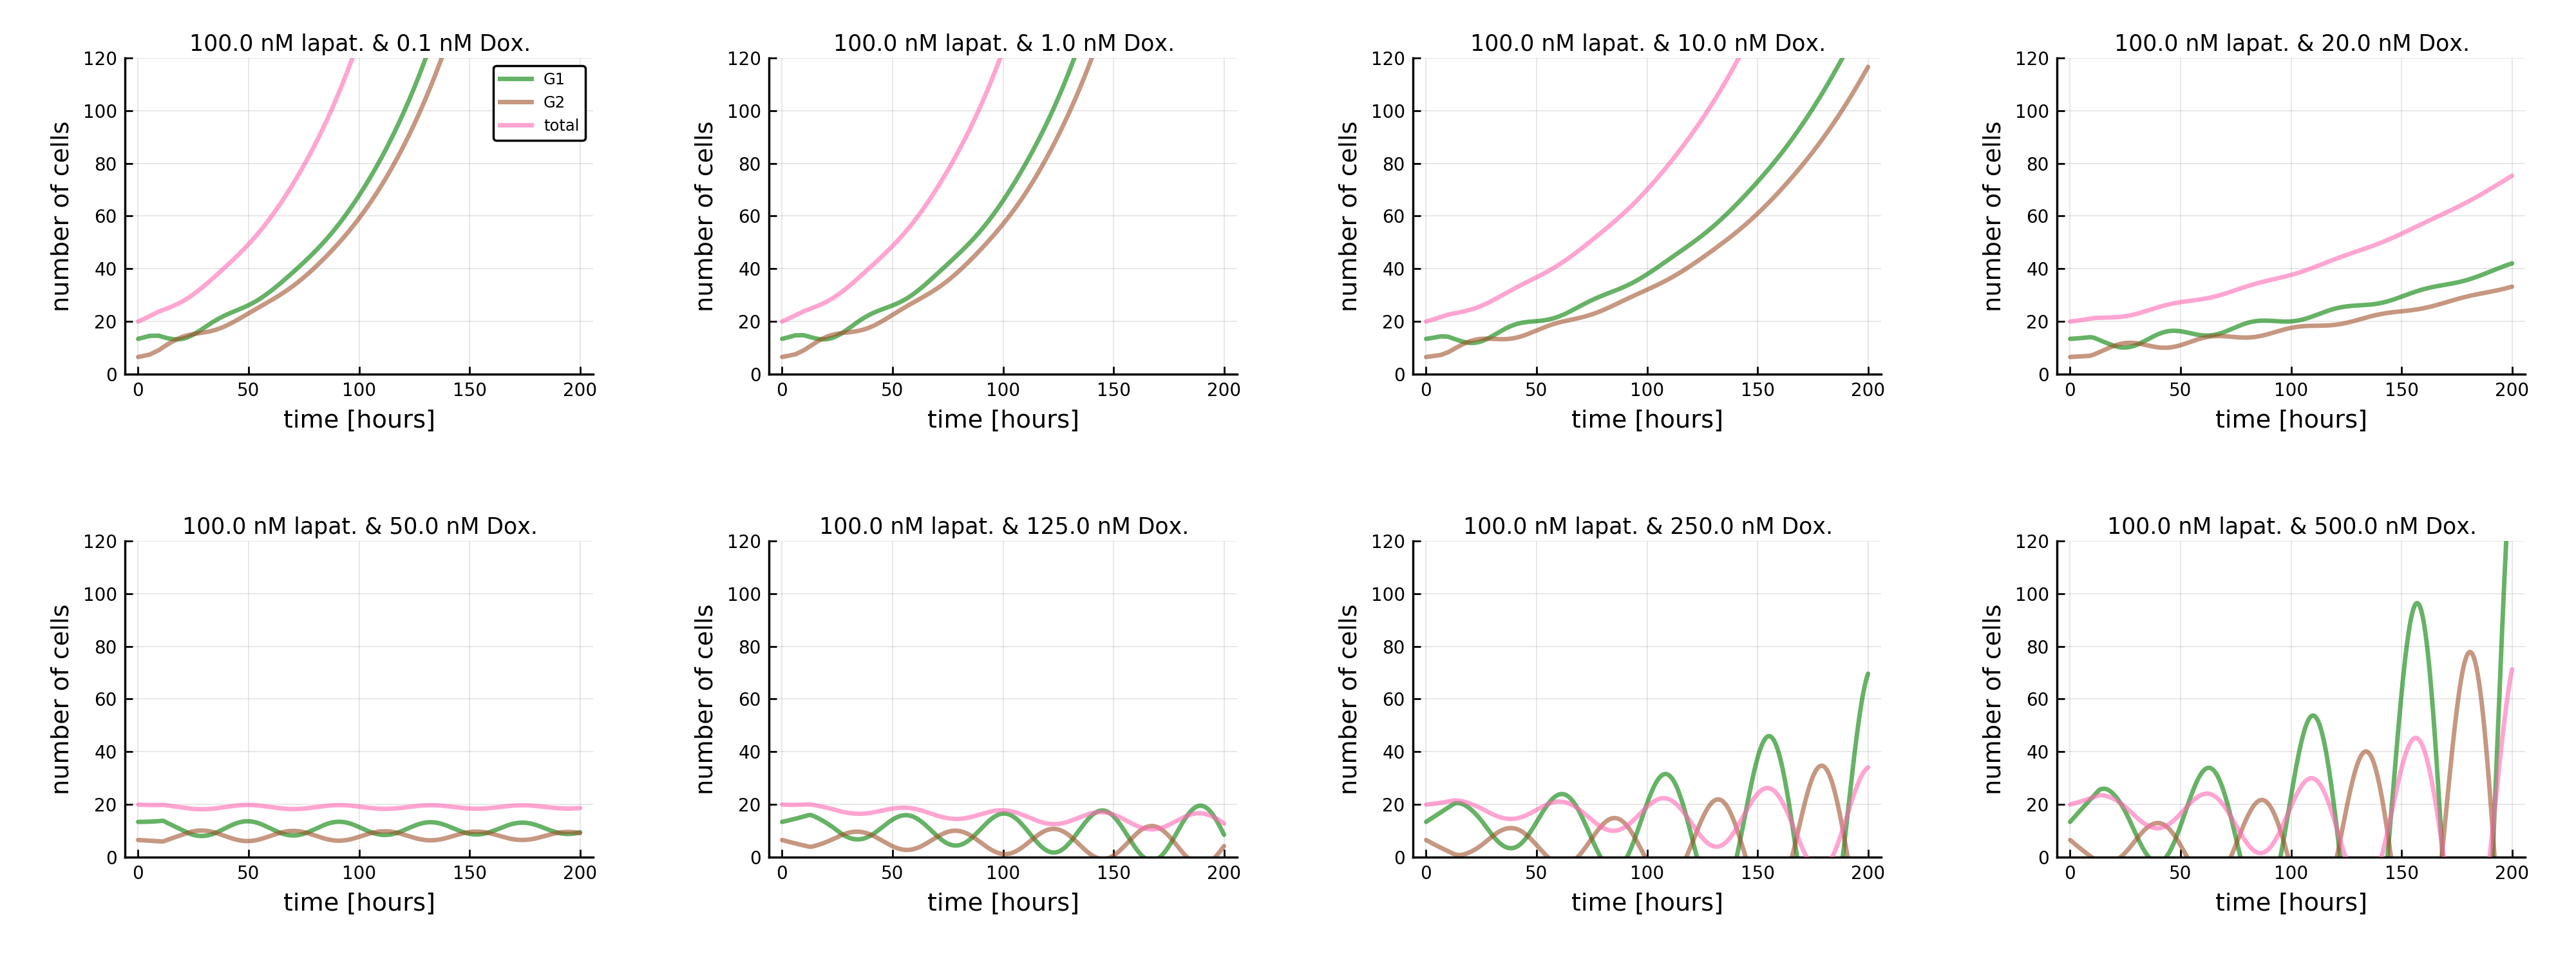

In [106]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 6, conc_l,conc_g)

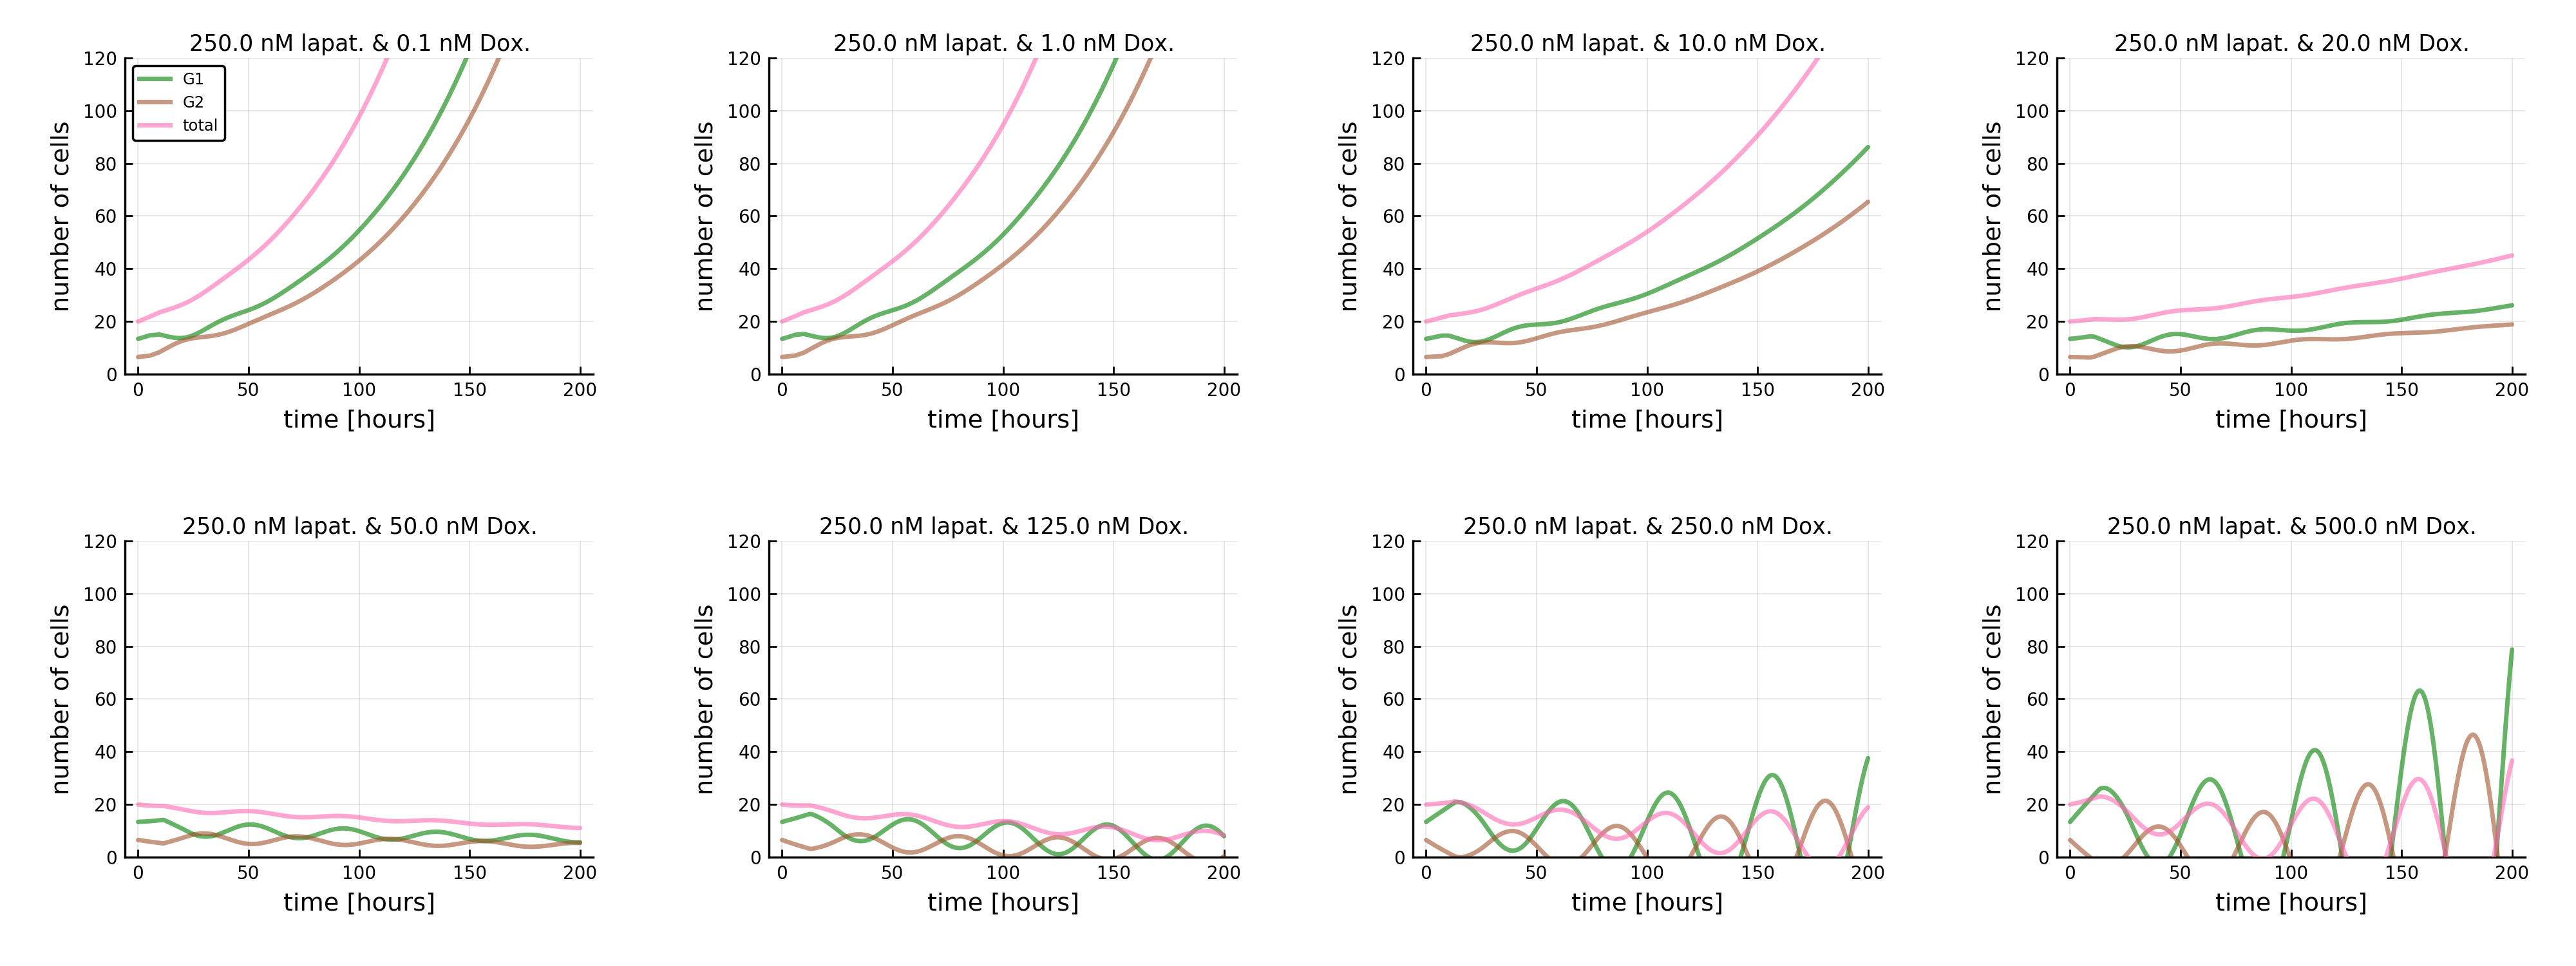

In [107]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 7, conc_l,conc_g)

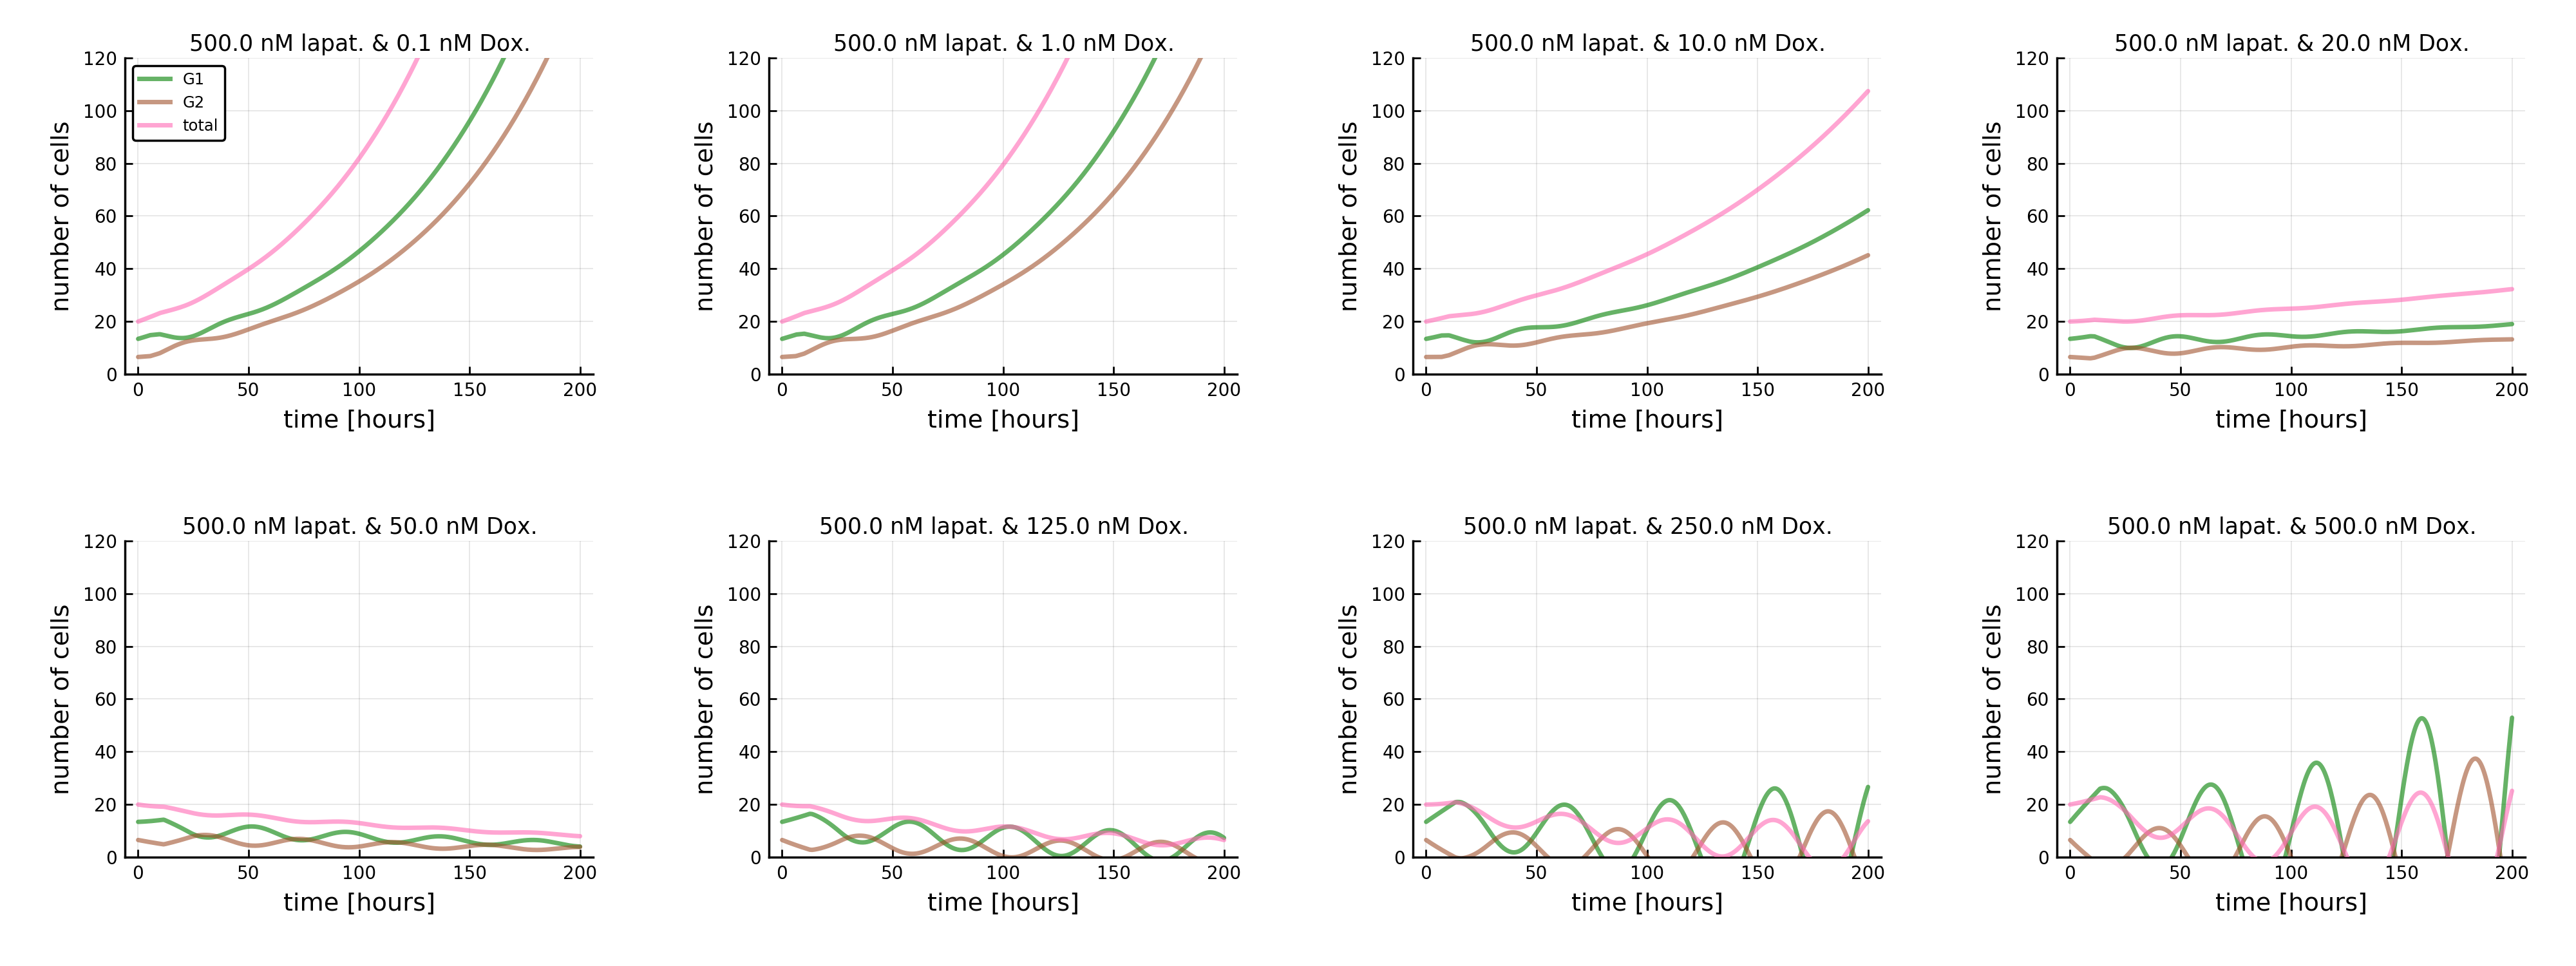

In [108]:
plot4combin(ddeparam, g2_l, g1_l, g2_0_l, g1_0_l, 8, conc_l,conc_g)